In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [ ]:
df = pd.read_csv('data/processed_data.csv', index_col=0)
df.head()

,Age,Ind_Household,Region,Lifetime,Income,Segment,Ind_deposit,Ind_email,Ind_phone,Ind_salary,trans_12_month,amont_trans,amont_day_from,trans_3_month,Gender,Target1,Target2
0,51.0,No,Midlands,3.0,53,Platinum,No,Yes,Yes,No,4140.91,3,21,910.02,F,No,No
1,47.0,No,Midlands,2.0,51,Gold,No,Yes,Yes,No,4202.63,5,14,977.80,U,No,No
2,45.0,No,North,6.0,50,Silver,No,Yes,Yes,No,4277.45,11,16,1001.54,M,No,No
3,78.0,No,Midlands,12.0,52,Platinum,Yes,Yes,Yes,No,4105.54,3,15,980.78,F,No,No
4,57.0,No,South East,8.0,52,Silver,Yes,Yes,Yes,No,4401.98,2,26,1003.68,F,Yes,No


In [74]:
df.shape

(981788, 17)

In [22]:
cat_features = ['Ind_Household', 'Region', 'Segment', 'Ind_deposit', 'Ind_email', 'Ind_phone', 'Ind_salary', 'Gender', 'Target1', 'Target2']
df = pd.get_dummies(df, columns=cat_features, drop_first=True)
df.head()

,Age,Lifetime,Income,trans_12_month,amont_trans,amont_day_from,trans_3_month,Ind_Household_Yes,Region_North,Region_Scottish,...,Segment_Silver,Segment_Tin,Ind_deposit_Yes,Ind_email_Yes,Ind_phone_Yes,Ind_salary_Yes,Gender_M,Gender_U,Target1_Yes,Target2_Yes
0,51.0,3.0,53,4140.91,3,21,910.02,False,False,False,...,False,False,False,True,True,False,False,False,False,False
1,47.0,2.0,51,4202.63,5,14,977.80,False,False,False,...,False,False,False,True,True,False,False,True,False,False
2,45.0,6.0,50,4277.45,11,16,1001.54,False,True,False,...,True,False,False,True,True,False,True,False,False,False
3,78.0,12.0,52,4105.54,3,15,980.78,False,False,False,...,False,False,True,True,True,False,False,False,False,False
4,57.0,8.0,52,4401.98,2,26,1003.68,False,False,False,...,True,False,True,True,True,False,False,False,True,False


Dimensions after PCA: (981788, 10)


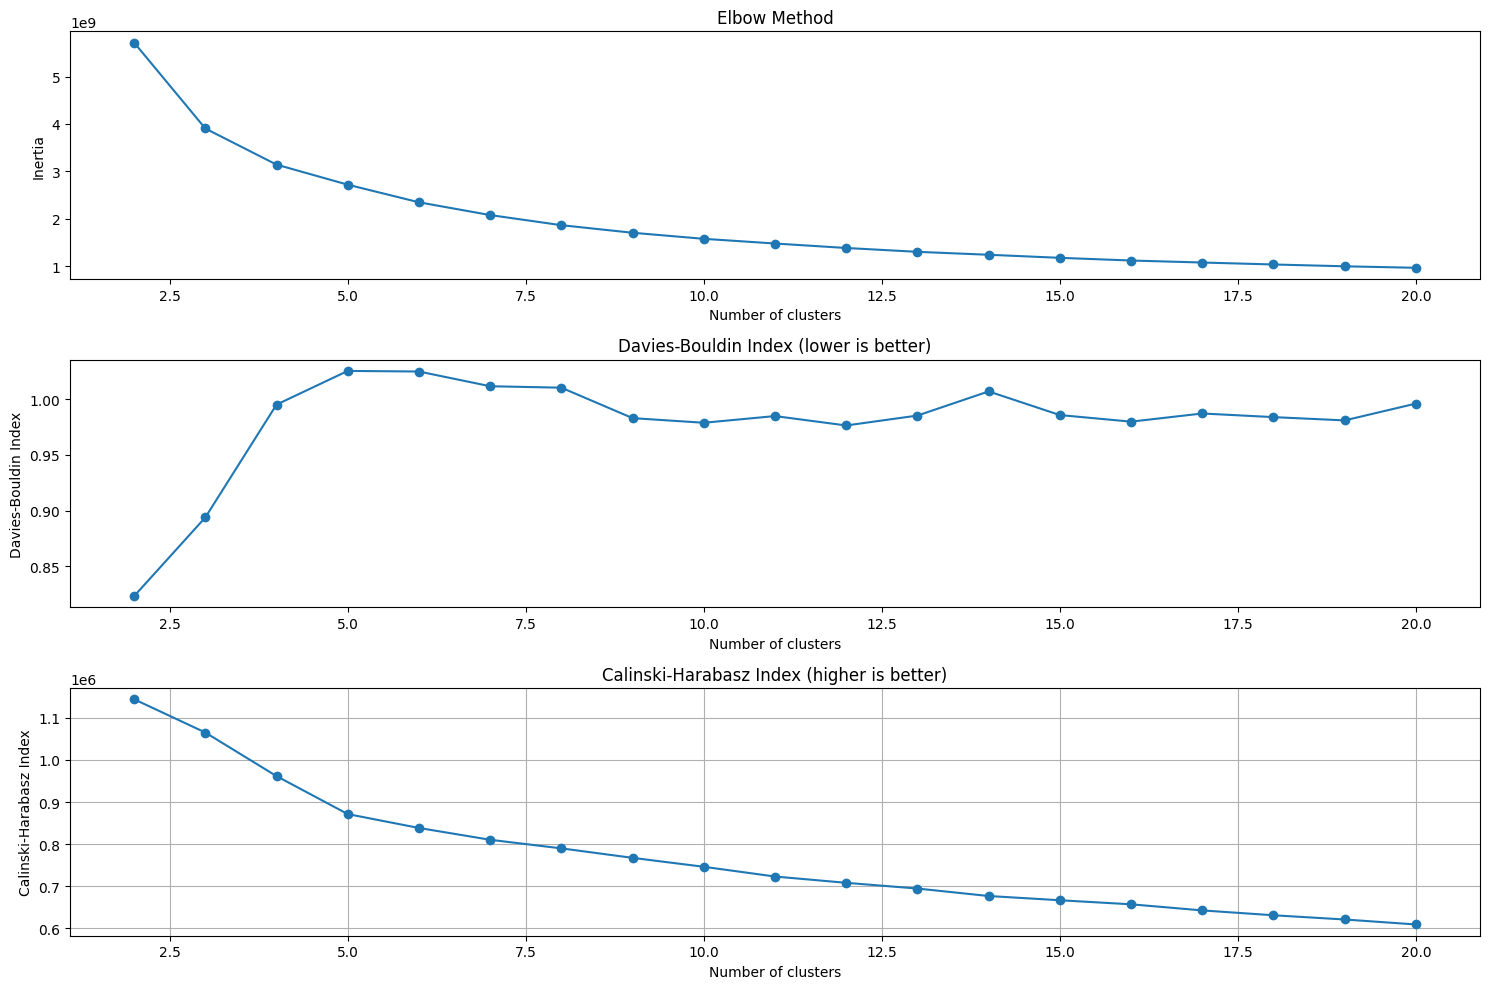

In [23]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

X = df.drop(columns=['Target1_Yes', 'Target2_Yes']).copy()

pca = PCA(n_components=10, random_state=42)
X_pca = pca.fit_transform(X)
print("Dimensions after PCA:", X_pca.shape)

cluster_range = range(2, 21)
inertia = []
db_scores = []
ch_scores = []

# Perform K-means for each cluster number
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_pca)
    
    # Calculate metrics
    inertia.append(kmeans.inertia_)
    db_scores.append(davies_bouldin_score(X_pca, kmeans.labels_))
    ch_scores.append(calinski_harabasz_score(X_pca, kmeans.labels_))

# Create subplots
plt.figure(figsize=(15, 10))

# Elbow Method (Inertia)
plt.subplot(3, 1, 1)
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')

# Davies-Bouldin Index
plt.subplot(3, 1, 2)
plt.plot(cluster_range, db_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index (lower is better)')

# Calinski-Harabasz Index
plt.subplot(3, 1, 3)
plt.plot(cluster_range, ch_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index (higher is better)')

plt.tight_layout()
plt.grid(True)
plt.show()

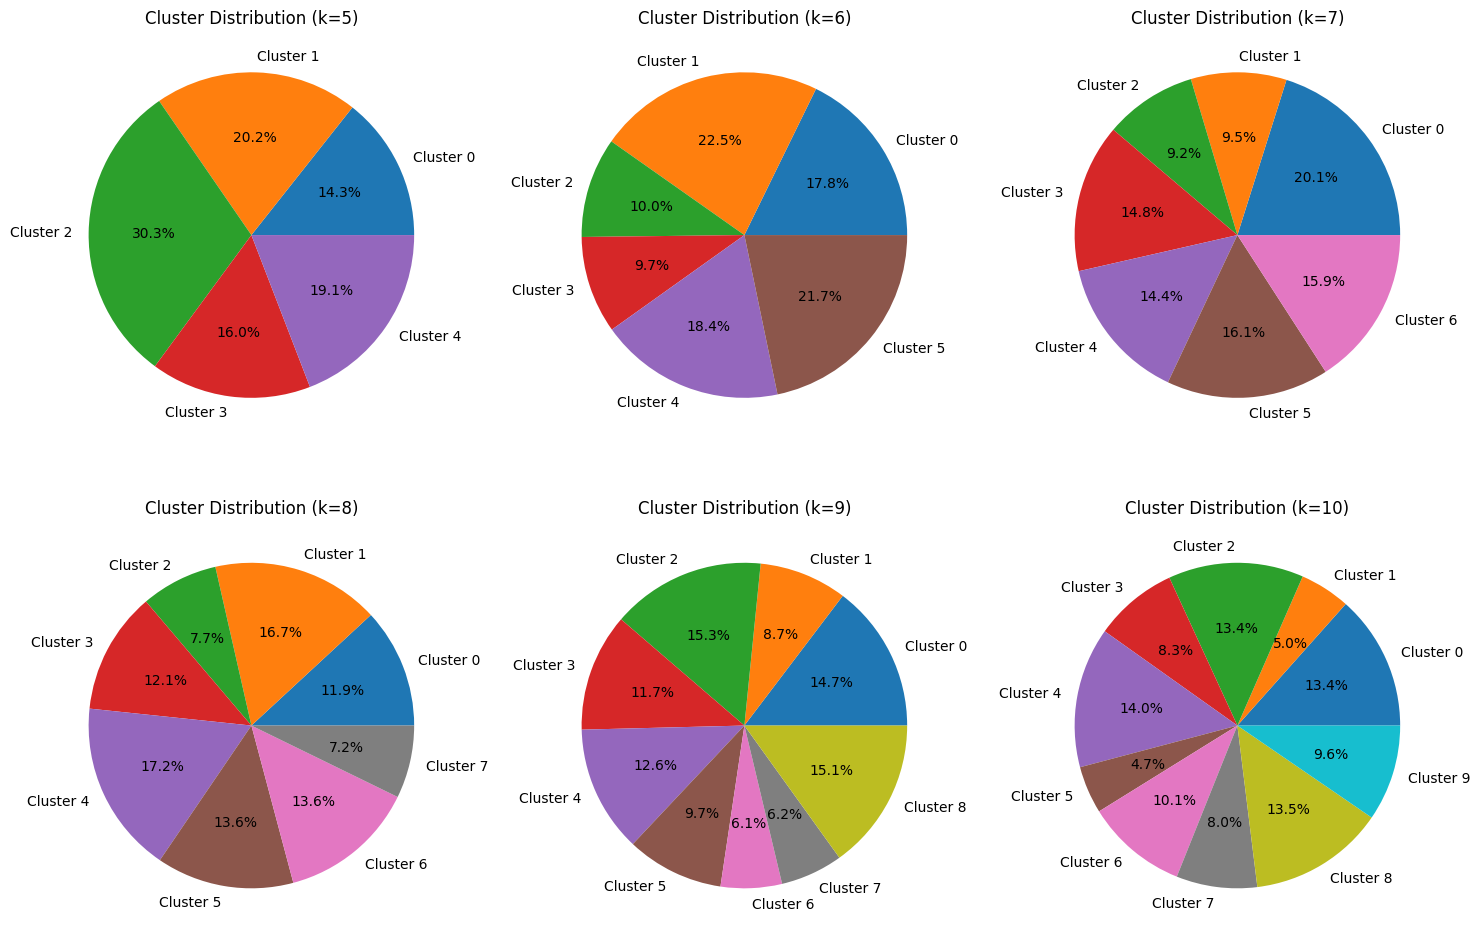

In [24]:
plt.figure(figsize=(15, 10))

for i, k in enumerate(range(5, 11)):
    # Perform K-means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(X_pca)
    
    # Get cluster counts
    unique, counts = np.unique(clusters, return_counts=True)
    cluster_dist = dict(zip(unique, counts))
    
    # Create pie chart
    plt.subplot(2, 3, i+1)
    plt.pie(counts, labels=[f'Cluster {u}' for u in unique], autopct='%1.1f%%')
    plt.title(f'Cluster Distribution (k={k})')

plt.tight_layout()
plt.show()

Разбиение на 7 кластеров получается достаточно равномерным и при этом с достаточным количеством кластеров. Остановимся на 7

In [25]:
kmeans = KMeans(n_clusters=7, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_pca)

In [26]:
df['cluster'] = clusters
df.head()

,Age,Lifetime,Income,trans_12_month,amont_trans,amont_day_from,trans_3_month,Ind_Household_Yes,Region_North,Region_Scottish,...,Segment_Tin,Ind_deposit_Yes,Ind_email_Yes,Ind_phone_Yes,Ind_salary_Yes,Gender_M,Gender_U,Target1_Yes,Target2_Yes,cluster
0,51.0,3.0,53,4140.91,3,21,910.02,False,False,False,...,False,False,True,True,False,False,False,False,False,4
1,47.0,2.0,51,4202.63,5,14,977.80,False,False,False,...,False,False,True,True,False,False,True,False,False,6
2,45.0,6.0,50,4277.45,11,16,1001.54,False,True,False,...,False,False,True,True,False,True,False,False,False,6
3,78.0,12.0,52,4105.54,3,15,980.78,False,False,False,...,False,True,True,True,False,False,False,False,False,5
4,57.0,8.0,52,4401.98,2,26,1003.68,False,False,False,...,False,True,True,True,False,False,False,True,False,1


In [27]:
from sklearn.preprocessing import StandardScaler

features = [col for col in df.columns if col != 'cluster']

data_std = df.copy()

scaler = StandardScaler()
data_std[features] = scaler.fit_transform(data_std[features])

cluster_means_std = data_std.groupby('cluster')[features].mean()
print("Mean values among clusters (standard):")
display(cluster_means_std)

Mean values among clusters (standard):


,Age,Lifetime,Income,trans_12_month,amont_trans,amont_day_from,trans_3_month,Ind_Household_Yes,Region_North,Region_Scottish,...,Segment_Silver,Segment_Tin,Ind_deposit_Yes,Ind_email_Yes,Ind_phone_Yes,Ind_salary_Yes,Gender_M,Gender_U,Target1_Yes,Target2_Yes
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.002107,-0.004437,-0.020881,0.064741,-0.001078,0.125458,-0.536946,0.002387,-0.000477,0.002789,...,0.006384,-0.006578,0.001932,-0.000881,0.001680,0.003208,-0.000860,-0.000781,-0.000837,0.002448
1,0.000453,-0.004148,0.000494,1.736169,0.004766,-0.404190,1.189680,-0.001652,-0.001918,-0.004799,...,-0.004123,0.000532,0.002741,0.004981,0.003401,0.005012,0.001969,-0.004139,0.003440,0.010696
2,-0.000478,-0.000500,0.006638,-1.793616,0.005107,0.598179,-0.849570,-0.002016,0.002549,-0.002270,...,0.000617,0.000847,-0.004819,0.000390,-0.001339,-0.003529,0.002499,-0.003261,0.001529,-0.019802
3,-0.005892,-0.003120,0.001535,0.957644,-0.003545,-0.210539,-0.034093,0.004182,0.001609,-0.004652,...,0.001338,-0.000138,-0.002619,0.003606,0.000089,0.002442,0.002162,-0.001916,0.001223,0.008721
4,0.003590,0.006038,-0.094417,-0.834734,-0.000905,0.709323,-1.059032,-0.004078,-0.000544,0.001395,...,-0.004459,0.007487,-0.000237,-0.000789,0.000503,-0.000565,0.001038,0.001215,-0.008871,-0.022192
5,-0.000646,0.006873,0.083426,-0.608925,0.001664,-0.313473,0.416791,0.000366,-0.002025,-0.000044,...,-0.004016,0.000409,0.000149,0.001248,0.001117,-0.001499,-0.001596,0.003793,0.003132,0.005551
6,0.000211,-0.001177,0.021866,0.403319,-0.002008,-0.393055,1.030608,-0.001430,0.001336,0.003752,...,0.000906,0.000441,0.001198,-0.005995,-0.005066,-0.005259,-0.002864,0.002173,0.001857,0.008355


In [28]:
feature_variances = cluster_means_std.var()

top_features = feature_variances.sort_values(ascending=False)
print("\nFeatures with hghest cross-cluster variance of means")
print(top_features)


Features with hghest cross-cluster variance of means
trans_12_month       1.397007
trans_3_month        0.796743
amont_day_from       0.222561
Income               0.002806
Target2_Yes          0.000196
Lifetime             0.000022
Target1_Yes          0.000018
Segment_Tin          0.000017
Segment_Silver       0.000016
Ind_salary_Yes       0.000014
Region_Unknown       0.000013
Ind_email_Yes        0.000013
Region_Scottish      0.000012
amont_trans          0.000011
Age                  0.000009
Gender_U             0.000009
Segment_Platinum     0.000008
Ind_Household_Yes    0.000008
Region_South West    0.000007
Ind_phone_Yes        0.000007
Ind_deposit_Yes      0.000007
Gender_M             0.000004
Region_South East    0.000004
Region_North         0.000003
dtype: float64


In [29]:
cluster_means = df.groupby('cluster')[features].mean()

top10_features = top_features.index[:10]

cluster_means_top10 = cluster_means[top10_features]
print("Mean values for top-10 clusters")
print(cluster_means_top10)


Mean values for top-10 clusters
         trans_12_month  trans_3_month  amont_day_from     Income  \
cluster                                                             
0           4196.456012     926.597610       20.608543  50.234998   
1           4363.624972    1009.909031       16.893586  50.351107   
2           4010.591159     911.513213       23.924211  50.384481   
3           4285.760339     950.860761       18.251854  50.356758   
4           4106.494344     901.406449       24.703770  49.835554   
5           4129.078789     972.616371       17.529878  50.801588   
6           4230.319114    1002.233618       16.971687  50.467198   

         Target2_Yes  Lifetime  Target1_Yes  Segment_Tin  Segment_Silver  \
cluster                                                                    
0           0.084496  6.520048     0.243906     0.289500        0.388319   
1           0.086782  6.521387     0.245744     0.292734        0.383206   
2           0.078330  6.538266     0.24492

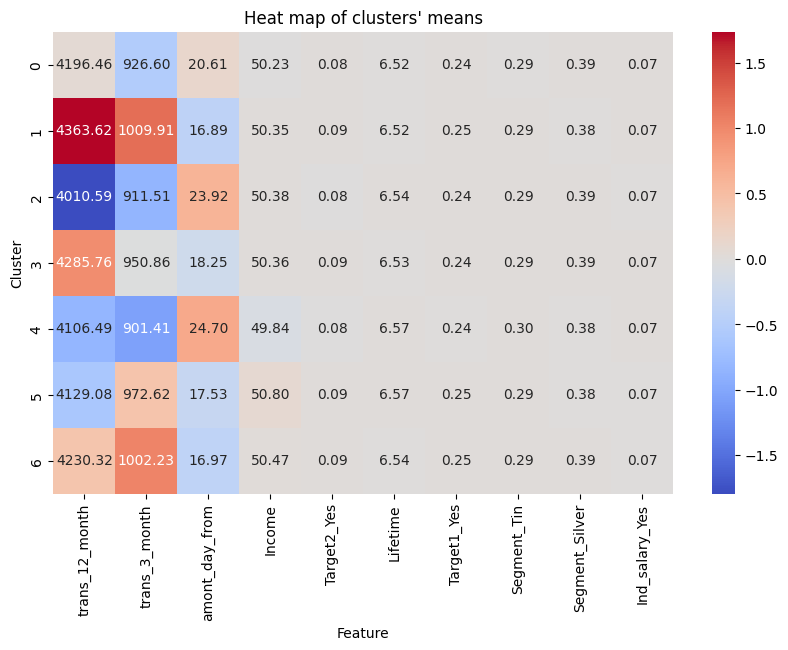

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

cluster_means_std_top10 = cluster_means_std[top10_features]

plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means_std_top10, annot=cluster_means_top10, fmt=".2f", cmap="coolwarm")
plt.title("Heat map of clusters' means")
plt.ylabel("Cluster")
plt.xlabel("Feature")
plt.show()

Количество транзакций за определенный срок - признаки с самой высокой дисперсией, которые не позволяют сегментировать по прочим признакам. Попробуем оставить только количество дней с последней транзакции в качестве признака, демонстрирующего активность пользователя и проделаем то же самое

Dimensions after PCA: (981788, 15)


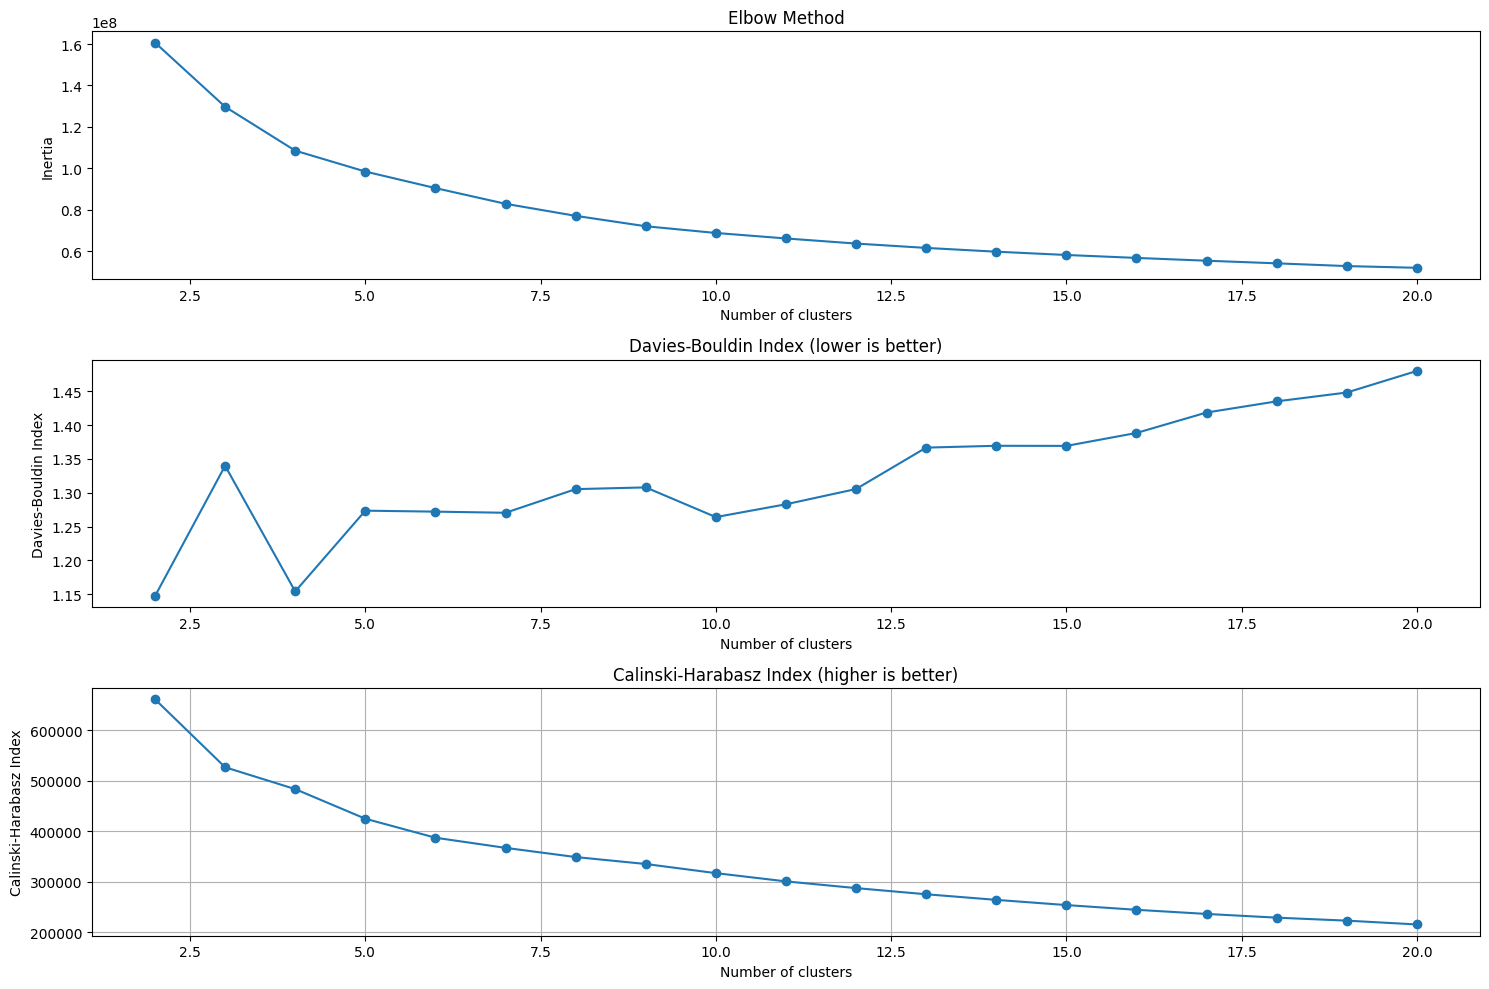

In [60]:
df = pd.read_csv('processed_data.csv', index_col=0)
df.head()

cat_features = ['Ind_Household', 'Region', 'Segment', 'Ind_deposit', 'Ind_email', 'Ind_phone', 'Ind_salary', 'Gender', 'Target1', 'Target2']
df = pd.get_dummies(df, columns=cat_features, drop_first=True)
df.head()


from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

X = df.drop(columns=['Target1_Yes', 'Target2_Yes', 'trans_12_month', 'trans_3_month']).copy()

pca = PCA(n_components=15, random_state=42)
X_pca = pca.fit_transform(X)
print("Dimensions after PCA:", X_pca.shape)

cluster_range = range(2, 21)
inertia = []
db_scores = []
ch_scores = []

# Perform K-means for each cluster number
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_pca)
    
    # Calculate metrics
    inertia.append(kmeans.inertia_)
    db_scores.append(davies_bouldin_score(X_pca, kmeans.labels_))
    ch_scores.append(calinski_harabasz_score(X_pca, kmeans.labels_))

# Create subplots
plt.figure(figsize=(15, 10))

# Elbow Method (Inertia)
plt.subplot(3, 1, 1)
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')

# Davies-Bouldin Index
plt.subplot(3, 1, 2)
plt.plot(cluster_range, db_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index (lower is better)')

# Calinski-Harabasz Index
plt.subplot(3, 1, 3)
plt.plot(cluster_range, ch_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index (higher is better)')

plt.tight_layout()
plt.grid(True)
plt.show()

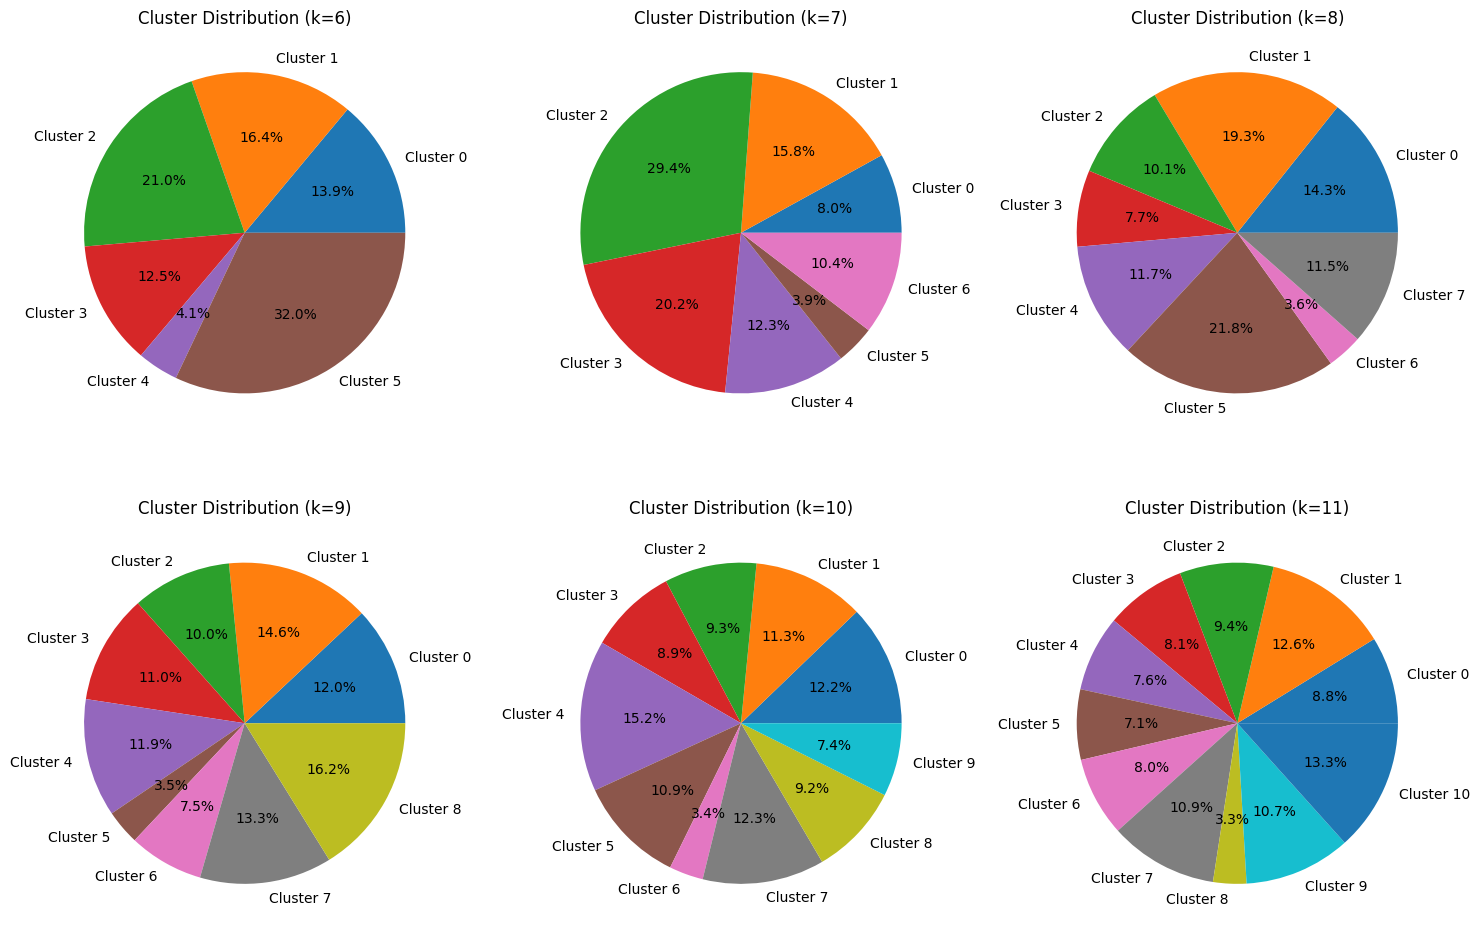

In [61]:
plt.figure(figsize=(15, 10))

for i, k in enumerate(range(6, 12)):
    # Perform K-means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(X_pca)
    
    # Get cluster counts
    unique, counts = np.unique(clusters, return_counts=True)
    cluster_dist = dict(zip(unique, counts))
    
    # Create pie chart
    plt.subplot(2, 3, i+1)
    plt.pie(counts, labels=[f'Cluster {u}' for u in unique], autopct='%1.1f%%')
    plt.title(f'Cluster Distribution (k={k})')

plt.tight_layout()
plt.show()

Ситуация значительно поменялась, при 6 кластерах отсутствует избыточный малопредставленный кластер, рассмотрим 6 кластеров.

In [62]:
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_pca)

In [63]:
df['cluster'] = clusters
df.head()

,Age,Lifetime,Income,trans_12_month,amont_trans,amont_day_from,trans_3_month,Ind_Household_Yes,Region_North,Region_Scottish,...,Segment_Tin,Ind_deposit_Yes,Ind_email_Yes,Ind_phone_Yes,Ind_salary_Yes,Gender_M,Gender_U,Target1_Yes,Target2_Yes,cluster
0,51.0,3.0,53,4140.91,3,21,910.02,False,False,False,...,False,False,True,True,False,False,False,False,False,5
1,47.0,2.0,51,4202.63,5,14,977.80,False,False,False,...,False,False,True,True,False,False,True,False,False,5
2,45.0,6.0,50,4277.45,11,16,1001.54,False,True,False,...,False,False,True,True,False,True,False,False,False,1
3,78.0,12.0,52,4105.54,3,15,980.78,False,False,False,...,False,True,True,True,False,False,False,False,False,2
4,57.0,8.0,52,4401.98,2,26,1003.68,False,False,False,...,False,True,True,True,False,False,False,True,False,0


In [64]:
from sklearn.preprocessing import StandardScaler

features = [col for col in df.columns if col not in ('cluster', 'Target1_Yes', 'Target2_Yes', 'trans_12_month', 'trans_3_month')]

data_std = df.copy()

scaler = StandardScaler()
data_std[features] = scaler.fit_transform(data_std[features])

cluster_means_std = data_std.groupby('cluster')[features].mean()
print("Mean values among clusters (standard):")
display(cluster_means_std)

Mean values among clusters (standard):


,Age,Lifetime,Income,amont_trans,amont_day_from,Ind_Household_Yes,Region_North,Region_Scottish,Region_South East,Region_South West,Region_Unknown,Segment_Platinum,Segment_Silver,Segment_Tin,Ind_deposit_Yes,Ind_email_Yes,Ind_phone_Yes,Ind_salary_Yes,Gender_M,Gender_U
cluster,,,,,,,,,,,,,,,,,,,,
0,0.434586,-0.091474,0.033770,-0.002785,1.545996,-0.003951,0.013100,-0.003291,-0.015907,0.016089,-0.002536,0.037216,-0.007918,-0.134779,-0.004505,-0.030149,-0.095654,-0.001407,-0.022814,-0.023292
1,-1.258220,-0.212948,-0.005775,0.004045,-0.524281,-0.002431,-0.028197,-0.008548,0.041015,-0.050014,0.008015,-0.139255,-0.003067,0.393029,0.001180,0.133277,0.153790,-0.002395,-0.033078,-0.053103
2,1.219703,-0.129291,-0.035940,0.000580,-0.472433,0.001205,-0.029382,-0.018665,-0.010973,0.067970,0.008936,0.180811,-0.015754,-0.394988,0.000034,-0.348789,0.153790,-0.001356,0.026537,0.051872
3,-1.161162,-0.191633,0.128595,-0.004172,1.311103,0.001920,-0.026005,-0.017179,0.039789,-0.057311,0.003466,-0.135719,-0.003843,0.381632,0.005323,0.133277,0.153790,0.000504,-0.098802,-0.185018
4,1.159515,3.403136,0.020314,-0.003355,-0.154479,0.000418,-0.026772,0.225327,-0.051213,0.094702,-0.052878,0.206295,0.093721,-0.550167,0.003613,-0.090869,0.116388,0.004683,0.020283,0.041346
5,-0.041525,-0.130738,-0.040794,0.000812,-0.584020,0.001375,0.041574,-0.004338,-0.015777,-0.015838,-0.003389,-0.037143,0.004747,0.038604,-0.001203,0.133277,-0.212807,0.001928,0.045286,0.069959


In [65]:
feature_variances = cluster_means_std.var()

top_features = feature_variances.sort_values(ascending=False)
print("\nFeatures with hghest cross-cluster variance of means")
print(top_features)


Features with hghest cross-cluster variance of means
Lifetime             2.107554
Age                  1.186680
amont_day_from       0.952466
Segment_Tin          0.153323
Ind_email_Yes        0.036658
Ind_phone_Yes        0.025370
Segment_Platinum     0.022746
Region_Scottish      0.009302
Gender_U             0.009056
Income               0.003881
Region_South West    0.003874
Gender_M             0.002778
Segment_Silver       0.001675
Region_South East    0.001296
Region_North         0.000887
Region_Unknown       0.000545
Ind_deposit_Yes      0.000012
amont_trans          0.000010
Ind_salary_Yes       0.000007
Ind_Household_Yes    0.000006
dtype: float64


In [66]:
cluster_means = df.groupby('cluster')[features].mean()

top10_features = top_features.index[:10]

cluster_means_top10 = cluster_means[top10_features]
print("Mean values for top-10 clusters")
print(cluster_means_top10)


Mean values for top-10 clusters
          Lifetime        Age  amont_day_from  Segment_Tin  Ind_email_Yes  \
cluster                                                                     
0         6.117300  59.305004       30.572200     0.231180       0.978599   
1         5.555201  37.695063       16.051269     0.471283       1.000000   
2         5.942310  69.327616       16.414932     0.112809       0.936873   
3         5.653833  38.934086       28.924659     0.466099       1.000000   
4        22.288003  68.559264       18.645061     0.042217       0.970648   
5         5.935614  53.227095       15.632261     0.310053       1.000000   

         Ind_phone_Yes  Segment_Platinum  Region_Scottish  Gender_U     Income  
cluster                                                                         
0             0.962525          0.044877         0.060849  0.183169  50.531860  
1             1.000000          0.011230         0.059585  0.171419  50.317054  
2             1.000000     

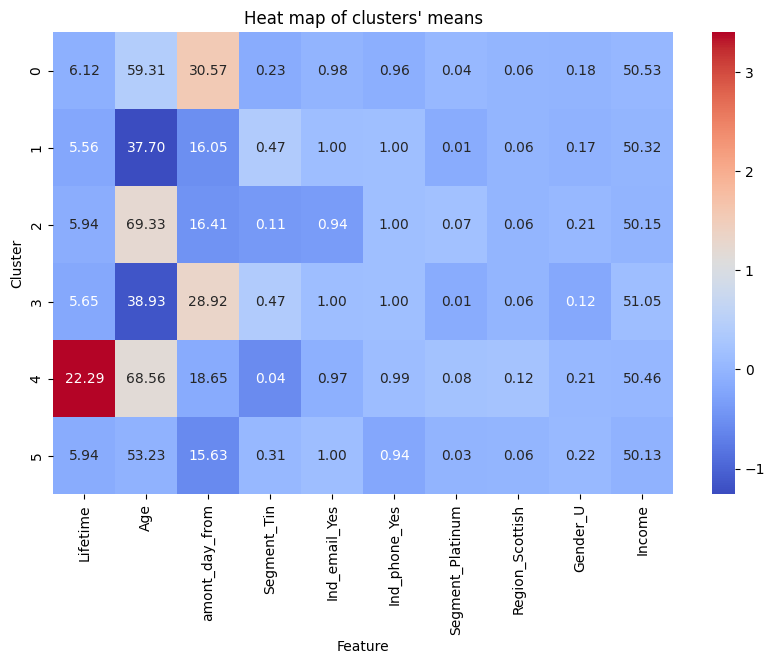

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

cluster_means_std_top10 = cluster_means_std[top10_features]

plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means_std_top10, annot=cluster_means_top10, fmt=".2f", cmap="coolwarm")
plt.title("Heat map of clusters' means")
plt.ylabel("Cluster")
plt.xlabel("Feature")
plt.show()

Новая кластеризация более информативна. Получим следующие сегменты:
1. Сегмент 1 - Достаточно взрослая аудитория, не очень давно являются клиентами банка и менее активная. Достаточно часто являются обладателями статуса выше минимального
2. Сегмент 2 - Молодые активные клиенты. Часто являются обладателями минимального статуса.
3. Сегмент 3 - Возрастная активная аудитория, недавно ставшая клиентами банка. Часто обладают статусом выше минимального и чаще большинства сегментов обладают платиновым статусом.
4. Сегмент 4 - Аналогичен сегменту 2, но менее активные клиенты
5. Сегмент 5 - Возрастные и активные клиенты, которые провели с банком больше всего времени. Реже всех являются обладателяи низшего статуса и чаще всех обладают платиновым статусом.
6. Сегмент 6 - Активные клиенты среднего возраста. Достаточно часто обладают низшим статусом.

In [69]:
for i in range(6):
    df_t = df[df['cluster'] == i]
    print(f'Доля ответивших на email в сегменте {i + 1}: {df_t['Target1_Yes'].mean()}')
    print(f'Доля ответивших на телефон в сегменте {i + 1}: {df_t['Target2_Yes'].mean()}')
    if i != 6:
        print('-' * 20)

Доля ответивших на email в сегменте 1: 0.3033179164566026
Доля ответивших на телефон в сегменте 1: 0.08928636665862943
--------------------
Доля ответивших на email в сегменте 2: 0.3479716741284586
Доля ответивших на телефон в сегменте 2: 0.13207371671648085
--------------------
Доля ответивших на email в сегменте 3: 0.11419646798046282
Доля ответивших на телефон в сегменте 3: 0.04187300832803838
--------------------
Доля ответивших на email в сегменте 4: 0.6376858990605915
Доля ответивших на телефон в сегменте 4: 0.2042825256927014
--------------------
Доля ответивших на email в сегменте 5: 0.1517152996845426
Доля ответивших на телефон в сегменте 5: 0.05397279179810725
--------------------
Доля ответивших на email в сегменте 6: 0.10963728659476607
Доля ответивших на телефон в сегменте 6: 0.0412045734120362
--------------------


In [70]:
df.head()

,Age,Lifetime,Income,trans_12_month,amont_trans,amont_day_from,trans_3_month,Ind_Household_Yes,Region_North,Region_Scottish,...,Segment_Tin,Ind_deposit_Yes,Ind_email_Yes,Ind_phone_Yes,Ind_salary_Yes,Gender_M,Gender_U,Target1_Yes,Target2_Yes,cluster
0,51.0,3.0,53,4140.91,3,21,910.02,False,False,False,...,False,False,True,True,False,False,False,False,False,5
1,47.0,2.0,51,4202.63,5,14,977.80,False,False,False,...,False,False,True,True,False,False,True,False,False,5
2,45.0,6.0,50,4277.45,11,16,1001.54,False,True,False,...,False,False,True,True,False,True,False,False,False,1
3,78.0,12.0,52,4105.54,3,15,980.78,False,False,False,...,False,True,True,True,False,False,False,False,False,2
4,57.0,8.0,52,4401.98,2,26,1003.68,False,False,False,...,False,True,True,True,False,False,False,True,False,0


In [71]:
df.to_csv('clustered_df.csv')

In [72]:
df.shape

(981788, 25)